<a href="https://colab.research.google.com/github/sancarhacer/MachineLearning/blob/main/SVMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) Classification Examples

This notebook contains multiple examples of using SVMs for classification tasks:

- **Email Classification** (Work vs Personal) using linear and RBF kernels.
- **Bank Loan Risk Classification** with different kernels and hyperparameter tuning using GridSearchCV.
- **Seismic Activity Classification**, including manual feature engineering for RBF-like transformations.

**Libraries used:** pandas, numpy, matplotlib, seaborn, scikit-learn, plotly

**Purpose:**
- Train and evaluate SVM models on different datasets
- Choose appropriate kernels (linear, RBF, poly, sigmoid)
- Perform hyperparameter tuning with GridSearchCV
- Visualize data and decision boundaries


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Email Classification (Work vs Personal)
# subject_formality_score -> Score based on formality of subject line
# sender_relationship_score -> Score representing how familiar the sender is
# email_type -> 0 = Personal, 1 = Work email
df = pd.read_csv("9-email_classification_svm.csv")
df.head()

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [52]:

df.describe()

,subject_formality_score,sender_relationship_score,email_type
count,1000.000000,1000.000000,1000.000000
mean,-1.009046,-0.006300,0.498000
std,0.654219,1.059501,0.500246
min,-3.532770,-2.218219,0.000000
25%,-1.252867,-1.006076,0.000000
50%,-0.994760,0.439233,0.000000
75%,-0.754839,0.994943,1.000000
max,2.180933,1.699497,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    1000 non-null   float64
 1   sender_relationship_score  1000 non-null   float64
 2   email_type                 1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


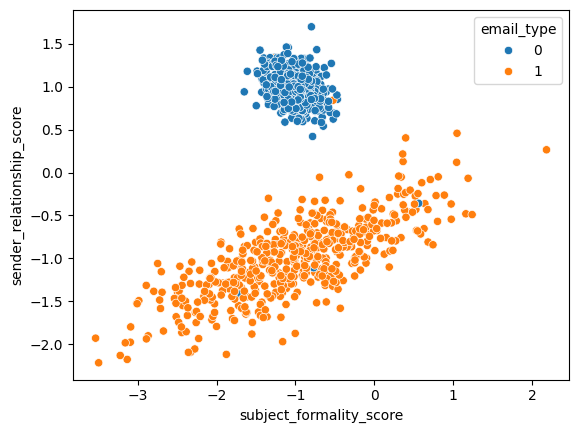

In [54]:
sns.scatterplot(x=df['subject_formality_score'],y=df['sender_relationship_score'],hue=df['email_type'])
plt.show()

In [55]:
df['email_type'].value_counts()

,count
email_type,
0,502
1,498


In [56]:
X=df.drop('email_type',axis=1)
y=df['email_type']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [58]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [59]:
svc.coef_

array([[ 0.60318833, -1.91645213]])

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       0.99      1.00      1.00       132

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   1]
 [  0 132]]


In [61]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred1=rbf.predict(X_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       0.99      1.00      1.00       132

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   1]
 [  0 132]]


In [62]:
#data is so simple, kernel change won't mean anything. let's try with a more complex data
df = pd.read_csv("9-loan_risk_svm.csv")
# Bank Loan Risk Classification
# credit_score_fluctuation -> Deviation from customer's average credit score
# recent_transaction_volume -> Volume of recent transactions in past 3 months (scaled)
# loan_risk -> 0 = Low risk, 1 = High risk
df.head()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
0,-1.439860,1.283010,1
1,-0.276571,-1.232382,0
2,1.312047,0.955097,1
3,1.020706,0.089485,0
4,1.513729,0.580520,1


In [63]:
df.describe()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
count,1000.000000,1000.000000,1000.000000
mean,-0.024200,-0.018748,0.504000
std,1.257080,1.222329,0.500234
min,-3.562160,-2.641815,0.000000
25%,-1.001007,-0.995190,0.000000
50%,-0.105200,-0.142727,1.000000
75%,1.007451,0.964210,1.000000
max,2.984892,3.338639,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score_fluctuation   1000 non-null   float64
 1   recent_transaction_volume  1000 non-null   float64
 2   loan_risk                  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [65]:
df.isnull().sum()

,0
credit_score_fluctuation,0
recent_transaction_volume,0
loan_risk,0


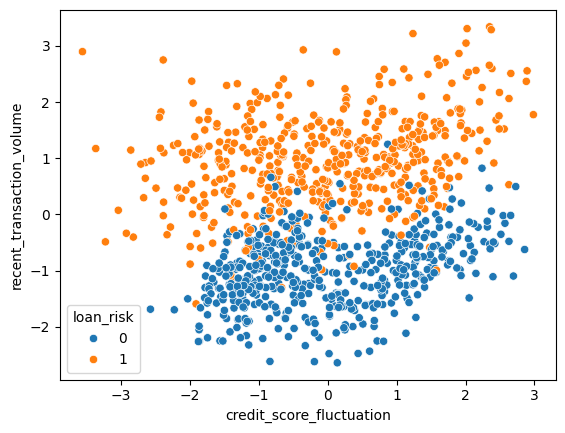

In [66]:
sns.scatterplot(x=df['credit_score_fluctuation'],y=df['recent_transaction_volume'],hue=df['loan_risk'])
plt.show()

In [67]:
X=df.drop('loan_risk',axis=1)
y=df['loan_risk']

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)


In [69]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)
y_pred3=linear.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       121
           1       0.91      0.93      0.92       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[109  12]
 [  9 120]]


In [70]:
rbf=SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred4=rbf.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       121
           1       0.94      0.91      0.93       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[113   8]
 [ 11 118]]


In [71]:
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred5=poly.predict(X_test)
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       121
           1       0.90      0.94      0.92       129

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[107  14]
 [  8 121]]


In [72]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred6=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       121
           1       0.83      0.84      0.84       129

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[ 98  23]
 [ 20 109]]


In [73]:
#rbf seems to be the choice, let's to hyperparameter tuning

In [74]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [75]:
grid=GridSearchCV(estimator=SVC(),param_grid=param_grid,refit=True,cv=5)

In [76]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [77]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [78]:
y_pred7=grid.predict(X_test)
print(classification_report(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       121
           1       0.94      0.91      0.93       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[113   8]
 [ 11 118]]


In [79]:
# even with a much more complicated data set let's manually create a kernel calculation
# Seismic Activity Classification
# underground_wave_energy -> Energy level of underground seismic wave (high variance)
# vibration_axis_variation -> Localized vibration variation on a vertical axis
# seismic_event_detected -> 1 = Seismic Event, 0 = No event (binary classification)
df = pd.read_csv("9-seismic_activity_svm.csv")
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   underground_wave_energy   400 non-null    float64
 1   vibration_axis_variation  400 non-null    float64
 2   seismic_event_detected    400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [81]:
df["seismic_event_detected"].value_counts()

,count
seismic_event_detected,
0,200
1,200


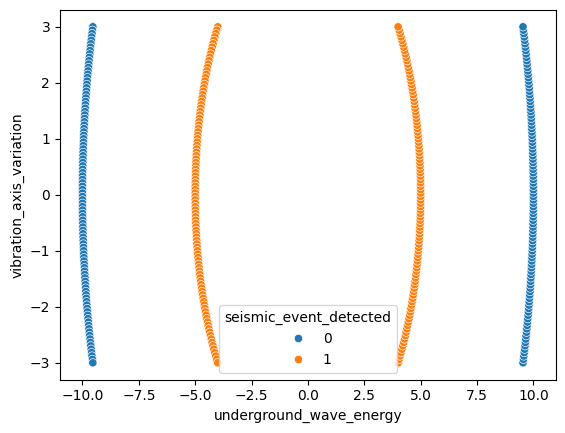

In [82]:
sns.scatterplot(x=df['underground_wave_energy'],y=df['vibration_axis_variation'],hue=df['seismic_event_detected'])
plt.show()

#### manual rbf kernel

In [83]:
df.columns

Index(['underground_wave_energy', 'vibration_axis_variation',
       'seismic_event_detected'],
      dtype='object')

In [84]:
df['underground_wave_energy **2']= df['underground_wave_energy']**2
df['vibration_axis_variation **2']= df['vibration_axis_variation']**2
df['underground_wave_energy*vibration_axis_variation'] = (df['underground_wave_energy'] *df['vibration_axis_variation'])
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected,underground_wave_energy **2,vibration_axis_variation **2,underground_wave_energy*vibration_axis_variation
0,9.539392,-3.000000,0,91.000000,9.000000,-28.618176
1,9.558241,-2.939394,0,91.359963,8.640037,-28.095434
2,9.576669,-2.878788,0,91.712580,8.287420,-27.569197
3,9.594678,-2.818182,0,92.057851,7.942149,-27.039548
4,9.612272,-2.757576,0,92.395776,7.604224,-26.506569


In [85]:
X=df.drop('seismic_event_detected',axis=1)
y=df['seismic_event_detected']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)
X_train.head()

,underground_wave_energy,vibration_axis_variation,underground_wave_energy **2,vibration_axis_variation **2,underground_wave_energy*vibration_axis_variation
135,-9.961312,0.878788,99.227732,0.772268,-8.753880
170,-9.922519,-1.242424,98.456382,1.543618,12.327978
368,-4.872667,-1.121212,23.742883,1.257117,5.463293
77,9.860133,1.666667,97.222222,2.777778,16.433555
12,9.738311,-2.272727,94.834711,5.165289,-22.132526


In [87]:
import plotly.express as px
fig = px.scatter_3d(df, x='underground_wave_energy **2', y='vibration_axis_variation **2', z='underground_wave_energy*vibration_axis_variation',
              color='seismic_event_detected')
fig.show()

In [88]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)
y_pred8=linear.predict(X_test)
print(classification_report(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]


####let's do automatic rbf

In [90]:
df = pd.read_csv("9-seismic_activity_svm.csv")
X=df.drop('seismic_event_detected',axis=1)
y=df['seismic_event_detected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)
#linear does not give a good score as expected
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred10=rbf.predict(X_test)
print(classification_report(y_test,y_pred10))
print(confusion_matrix(y_test,y_pred10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]
